<a href="https://colab.research.google.com/github/novelyaasis32/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


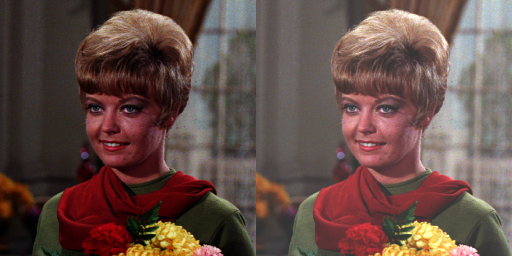

In [40]:
#Praktikum
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Erorr, not a number')

original = cv.imread('/content/drive/MyDrive/images/Images/female.tiff')
brightness_image = np.zeros(original.shape,original.dtype)

#akses per piksel
for y in range (original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 40
Masukkan kontras [1.0 - 3.0]: 2


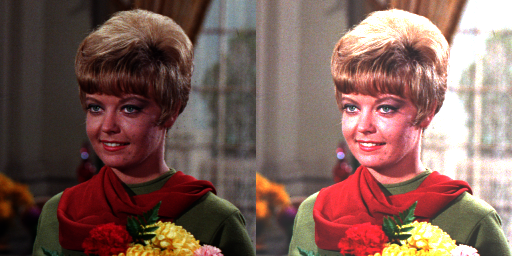

In [41]:
#Tugas 1
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: ')),
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 40


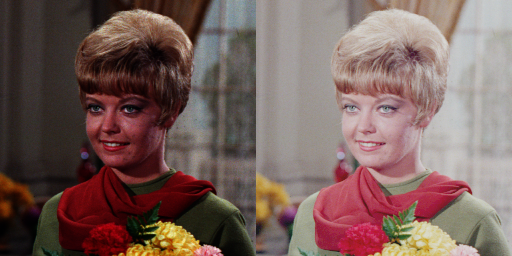

In [17]:
#Tugas 2
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log([1 + original[y,x,c]])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

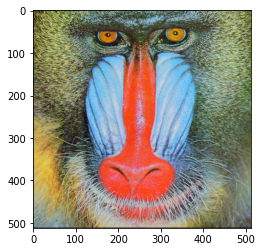

In [51]:
img_lly = cv.imread('/content/drive/MyDrive/images/Images/mandrill.tiff')
img_akt = cv.cvtColor(img_lly,cv.COLOR_BGR2RGB) 
plt.imshow(img_akt)

Averaging


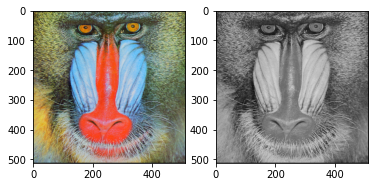

In [49]:
#Averaging
img_lly = cv.imread('/content/drive/MyDrive/images/Images/mandrill.tiff')
img_lly[:] = img_lly.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
print('Averaging')
ax[0].imshow(img_rgb)
ax[1].imshow(img_lly)



Lightness


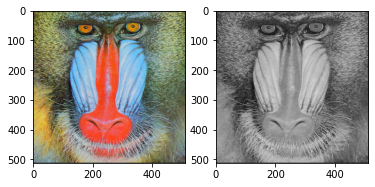

In [48]:
#Lightness 
img_try = cv.imread('/content/drive/MyDrive/images/Images/mandrill.tiff')
img_try[:] = np.max(img_try,axis=-1,keepdims=10)/2+np.min(img_try,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
print('Lightness')
ax[0].imshow(img_rgb)
ax[1].imshow(img_try)

Luminance


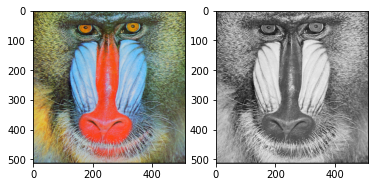

In [47]:
#Luminance 
image_rgb = cv.imread('/content/drive/MyDrive/images/Images/mandrill.tiff')
R, G, B = image_rgb [:,:,0], image_rgb [:,:,1], image_rgb [:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
print('Luminance')
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

Grayscale


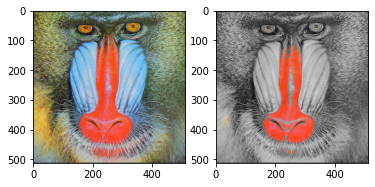

In [46]:
#Tugas 4
ori_avg = cv.imread('/content/drive/MyDrive/images/Images/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_avg, cv.COLOR_BGR2RGB)
red, mask = cv.threshold(ori_avg[:,:,2], 225, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(ori_avg)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(ori_rgb, mask3)

gray = cv.cvtColor(ori_avg, cv.COLOR_BGR2GRAY)
ori_avg = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(ori_avg, 255 - mask3)
out = gray + red

fig, ax = plt.subplots(1,2)
print('Grayscale')
ax[0].imshow(ori_rgb)
ax[1].imshow(out, cmap='gray')